### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [4]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Import the necessary packages - 2.5 marks

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [6]:
# Load the data into pandas dataframe
df = pd.read_csv("Data.csv")
df = pd.read_csv("item.csv")
df = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [8]:
# Check column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [26]:
# Check number of rows and columns
df.shape

(1681, 22)

In [29]:
df.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
Western,0,0.0
War,0,0.0
movie title,0,0.0
release date,0,0.0
unknown,0,0.0
Action,0,0.0
Adventure,0,0.0
Animation,0,0.0
Childrens,0,0.0
Comedy,0,0.0


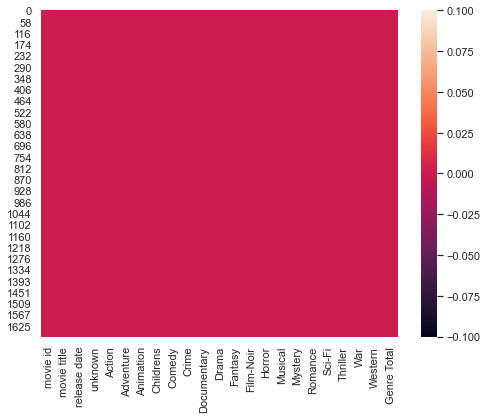

In [96]:
# Check missing values via heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.isna())
plt.show()

#### 4. Find the number of movies per genre using the item data - 5 marks

In [24]:
df = pd.read_csv("item.csv")
df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [40]:
# use sum on the default axis
df.sum(axis = 0, skipna = True) 

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

In [36]:
# use sum on the target axis
df[['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [61]:
#hint: use sum on the axis = 1
df['Genre Total']= df.iloc[:, -22:-4].sum(axis=1)
df[df['Genre Total'] > 1]
print("Select specific columns:")
print(df[['movie title', 'Genre Total']])

Select specific columns:
                              movie title  Genre Total
0                              Toy Story             3
1                              GoldenEye             2
2                             Four Rooms             0
3                             Get Shorty             3
4                                Copycat             2
...                                   ...          ...
1676                          Mat' i syn             1
1677                           B. Monkey             1
1678                       Sliding Doors             2
1679                        You So Crazy             1
1680  Scream of Stone (Schrei aus Stein)             1

[1681 rows x 2 columns]


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [55]:
df = pd.read_csv("item.csv")
new_df = df [ df ['unknown']==1]
new_df.head(1681)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df = df.drop([1371], axis=0)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks


In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [71]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [72]:
sns.set(color_codes=True)

In [91]:
userdata = pd.read_csv("user.csv")
userdata.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [92]:
userdata.shape

(943, 5)

In [93]:
ratingdata = pd.read_csv("Data.csv")
ratingdata.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [94]:
ratingdata.shape

(100000, 4)

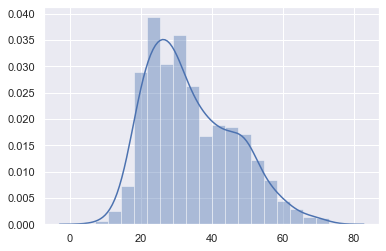

In [101]:
sns.distplot(userdata[['age']]);

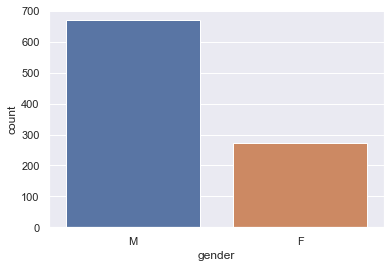

In [104]:
sns.countplot(x="gender", data=userdata);

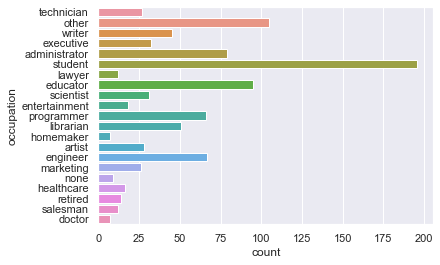

In [110]:
sns.countplot(y="occupation", data=userdata);

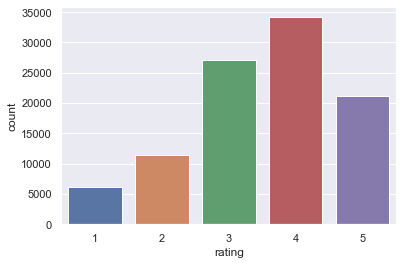

In [111]:
sns.countplot(x="rating", data=ratingdata);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [114]:
print("Select specific columns:")
print(df[['release date', 'movie title', 'Genre Total']])

Select specific columns:
     release date                          movie title  Genre Total
0     01-Jan-1995                           Toy Story             3
1     01-Jan-1995                           GoldenEye             2
2     01-Jan-1995                          Four Rooms             0
3     01-Jan-1995                          Get Shorty             3
4     01-Jan-1995                             Copycat             2
...           ...                                  ...          ...
1676  06-Feb-1998                          Mat' i syn             1
1677  06-Feb-1998                           B. Monkey             1
1678  01-Jan-1998                       Sliding Doors             2
1679  01-Jan-1994                        You So Crazy             1
1680  08-Mar-1996  Scream of Stone (Schrei aus Stein)             1

[1680 rows x 3 columns]


In [116]:
df.groupby(['release date','movie title']).sum()

movie id  unknown  Action  Adventure  \
release date movie title                                                       
01-Aug-1997  Air Bud                         261        0       0          0   
             In the Company of Men           262        0       0          0   
             Picture Perfect                 873        0       0          0   
             Spawn                           358        0       1          1   
01-Feb-1998  Letter From Death Row, A       1191        0       0          0   
...                                          ...      ...     ...        ...   
31-Jan-1997  Waiting for Guffman            1007        0       0          0   
31-Jul-1996  Chain Reaction                  930        0       1          1   
31-May-1996  Arrival, The                    825        0       1          0   
             Dragonheart                     472        0       1          1   
             Eddie                           819        0       0          0   

                                        Animation  Childrens  Comedy  Crime  \
release date movie title                                                      
01-Aug-1997  Air Bud                            0          1       1      0   
             In the Company of Men              0          0       0      0   
             Picture Perfect                    0          0       1      0   
             Spawn                              0          0       0      0   
01-Feb-1998  Letter From Death Row, A           0          0       0      1   
...                                           ...        ...     ...    ...   
31-Jan-1997  Waiting for Guffman                0          0       1      0   
31-Jul-1996  Chain Reaction                     0          0       0      0   
31-May-1996  Arrival, The                       0          0       0      0   
             Dragonheart                        0          0       0      0   
             Eddie                              0          0       1      0   

                                        Documentary  Drama  ...  Film-Noir  \
release date movie title                                    ...              
01-Aug-1997  Air Bud                              0      0  ...          0   
             In the Company of Men                0      1  ...          0   
             Picture Perfect                      0      0  ...          0   
             Spawn                                0      0  ...          0   
01-Feb-1998  Letter From Death Row, A             0      1  ...          0   
...                                             ...    ...  ...        ...   
31-Jan-1997  Waiting for Guffman                  0      0  ...          0   
31-Jul-1996  Chain Reaction                       0      0  ...          0   
31-May-1996  Arrival, The                         0      0  ...          0   
             Dragonheart                          0      0  ...          0   
             Eddie                                0      0  ...          0   

                                        Horror  Musical  Mystery  Romance  \
release date movie title                                                    
01-Aug-1997  Air Bud                         0        0        0        0   
             In the Company of Men           0        0        0        0   
             Picture Perfect                 0        0        0        1   
             Spawn                           0        0        0        0   
01-Feb-1998  Letter From Death Row, A        0        0        0        0   
...                                        ...      ...      ...      ...   
31-Jan-1997  Waiting for Guffman             0        0        0        0   
31-Jul-1996  Chain Reaction                  0        0        0        0   
31-May-1996  Arrival, The                    0        0        0        0   
             Dragonheart                     0        0        0        0   
             Eddie              

In [119]:
df = sns.load_dataset("df")
df = df.pivot("release date", "Genre Total")
ax = sns.heatmap(df)

HTTPError: HTTP Error 404: Not Found

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [121]:
merged_inner = pd.merge(left=df, right=ratingdata, left_on='movie id', right_on='movie id')
# In this case `movie id` is the only column name in  both dataframes

# What's the size of the output data?
merged_inner.shape
merged_inner

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Romance,Sci-Fi,Thriller,War,Western,Genre Total,Genre,user id,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,3,3,308,4,887736532
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,3,3,287,5,875334088
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,3,3,148,4,877019411
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,3,3,280,4,891700426
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,3,3,66,3,883601324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,863,1,889289570
99986,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,863,3,889289491
99987,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,1,0,0,0,0,2,2,863,2,889289570
99988,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,896,3,887160722


In [123]:
merged_inner.groupby("movie title").mean()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Romance,Sci-Fi,Thriller,War,Western,Genre Total,Genre,user id,rating,timestamp
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2.0,2.0,383.777778,2.333333,8.861152e+08
1-900,1353.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,477.000000,2.600000,8.797260e+08
101 Dalmatians,225.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,450.330275,2.908257,8.829281e+08
12 Angry Men,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,453.552000,4.344000,8.828963e+08
187,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,517.097561,3.024390,8.850084e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns,232.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,456.168317,3.207921,8.835963e+08
Young Guns II,1188.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,504.068182,2.772727,8.821855e+08
"Young Poisoner's Handbook, The",547.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,452.487805,3.341463,8.821438e+08


In [137]:
merged_inner.sort_values(by=['rating'], inplace=True, ascending=False)
merged_inner.head(100)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Romance,Sci-Fi,Thriller,War,Western,Genre Total,Genre,user id,rating,timestamp
36014,234,Jaws,01-Jan-1975,0,1,0,0,0,0,0,...,0,0,0,0,0,2,2,592,5,882955863
34407,223,Sling Blade,22-Nov-1996,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,593,5,888872089
6645,50,Star Wars,01-Jan-1977,0,1,1,0,0,0,0,...,1,1,0,1,0,4,4,182,5,885613018
90709,945,Charade,01-Jan-1963,0,0,0,0,0,1,0,...,1,0,1,0,0,3,3,848,5,887043821
34410,224,Ridicule,27-Nov-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,151,5,879524293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31899,209,This Is Spinal Tap,01-Jan-1984,0,0,0,0,0,1,0,...,0,0,0,0,0,3,3,643,5,891446652
2377,12,"Usual Suspects, The",14-Aug-1995,0,0,0,0,0,0,1,...,0,0,1,0,0,1,1,557,5,881179653
90650,944,Renaissance Man,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,1,0,2,2,495,5,888637768
2376,12,"Usual Suspects, The",14-Aug-1995,0,0,0,0,0,0,1,...,0,0,1,0,0,1,1,499,5,885599040


In [138]:
top_ratings= merged_inner["rating"].isin(["5"]) 
top_ratings.head(100)

36014    True
34407    True
6645     True
90709    True
34410    True
         ... 
31899    True
2377     True
90650    True
2376     True
2374     True
Name: rating, Length: 100, dtype: bool

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:

